In [1]:
from datetime import datetime
import json
import pandas as pd
import requests
import time
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from config import db_url, auth, sender_email, password, receiver_email


In [2]:

today  = str(datetime.today())
print(f"--- {today} --- Starting the dividendStocks script\n")

def get_snowball_analytics(stock_ids):
    all_div_stocks_data = []
    try:
        for key, value in stock_ids.items():  
            url = "https://snowball-analytics.com/extapi/api/public/asset-info/summary"

            querystring = {"assetInfoId":f"{value}"}

            payload = ""
            headers = {
                "Accept": "application/json, text/plain, */*",
                "Authorization": auth,
                "Sec-Fetch-Site": "same-origin",
                "Accept-Encoding": "gzip, deflate, br",
                "Accept-Language": "en",
                "Sec-Fetch-Mode": "cors",
                "Host": "snowball-analytics.com",
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15",
                #"Referer": "https://snowball-analytics.com/public/asset/APP.US.USD",
                "Connection": "keep-alive",
                "Sec-Fetch-Dest": "empty",
                "Cookie": "_clsk=aar3ld%7C1722576463093%7C1%7C1%7Cr.clarity.ms%2Fcollect; _ga_NV375FXVKD=GS1.1.1722576360.1.1.1722576463.34.0.0; _uetsid=b4a55010508f11ef982eb311d6a98e9f; _uetvid=b4a57ec0508f11efa0b5335dea2ea0f2; storeUserId=c19a93a1-8775-4385-924b-a740e27966f8; _clck=vrwayn%7C2%7Cfnz%7C0%7C1675; _fbp=fb.1.1722576371399.190183847727114273; AMP_bb1a3b9b1e=JTdCJTIyZGV2aWNlSWQlMjIlM0ElMjJiNWY0NjQwMC01NWQyLTRlMWUtOWFmNy1kMTVhZjI5NmZkZDYlMjIlMkMlMjJzZXNzaW9uSWQlMjIlM0ExNzIyNTc2MzYxMDkxJTJDJTIyb3B0T3V0JTIyJTNBZmFsc2UlMkMlMjJsYXN0RXZlbnRUaW1lJTIyJTNBMTcyMjU3NjQ2MTkzNCUyQyUyMmxhc3RFdmVudElkJTIyJTNBOCUyQyUyMnBhZ2VDb3VudGVyJTIyJTNBMCU3RA==; _ga=GA1.2.1766618733.1722576363; _gid=GA1.2.1876973246.1722576365; CookieScriptConsent={'googleconsentmap':{'ad_storage':'targeting','analytics_storage':'performance','ad_user_data':'targeting','ad_personalization':'targeting','functionality_storage':'functionality','personalization_storage':'functionality','security_storage':'functionality'},'bannershown':1,'action':'accept','consenttime':1720088611,'categories':'[\'performance\',\'targeting\',\'functionality\']','GoogleACString':'2~43.46.55.61.70.83.89.93.108.117.122.124.135.143.144.147.149.159.192.196.202.211.228.230.239.259.266.286.291.311.320.322.323.327.367.371.385.394.397.407.413.415.424.430.436.445.453.486.491.494.495.522.523.540.550.559.560.568.574.576.584.587.591.737.802.803.820.821.839.864.899.904.922.931.938.979.981.985.1003.1027.1031.1040.1046.1051.1053.1067.1085.1092.1095.1097.1099.1107.1135.1143.1149.1152.1162.1166.1186.1188.1205.1215.1226.1227.1230.1252.1268.1270.1276.1284.1290.1301.1307.1312.1345.1356.1364.1375.1403.1415.1416.1421.1423.1440.1449.1455.1495.1512.1516.1525.1540.1548.1555.1558.1570.1577.1579.1583.1584.1591.1603.1616.1638.1651.1653.1659.1667.1677.1678.1682.1697.1699.1703.1712.1716.1721.1725.1732.1745.1750.1765.1782.1786.1800.1810.1825.1827.1832.1838.1840.1842.1843.1845.1859.1866.1870.1878.1880.1889.1899.1917.1929.1942.1944.1962.1963.1964.1967.1968.1969.1978.1985.1987.2003.2008.2027.2035.2039.2047.2052.2056.2064.2068.2072.2074.2088.2090.2103.2107.2109.2115.2124.2130.2133.2135.2137.2140.2147.2150.2156.2166.2177.2183.2186.2205.2213.2216.2219.2220.2222.2225.2234.2253.2279.2282.2292.2305.2309.2312.2316.2322.2325.2328.2331.2334.2335.2336.2337.2343.2354.2357.2358.2359.2370.2376.2377.2387.2400.2403.2405.2407.2411.2414.2416.2418.2425.2440.2447.2461.2462.2465.2468.2472.2477.2481.2484.2486.2488.2493.2498.2501.2510.2517.2526.2527.2532.2535.2542.2552.2563.2564.2567.2568.2569.2571.2572.2575.2577.2583.2584.2596.2604.2605.2608.2609.2610.2612.2614.2621.2628.2629.2633.2636.2642.2643.2645.2646.2650.2651.2652.2656.2657.2658.2660.2661.2669.2670.2677.2681.2684.2687.2690.2695.2698.2713.2714.2729.2739.2767.2768.2770.2772.2784.2787.2791.2792.2798.2801.2805.2812.2813.2816.2817.2821.2822.2827.2830.2831.2834.2838.2839.2844.2846.2849.2850.2852.2854.2860.2862.2863.2865.2867.2869.2873.2874.2875.2876.2878.2880.2881.2882.2883.2884.2886.2887.2888.2889.2891.2893.2894.2895.2897.2898.2900.2901.2908.2909.2916.2917.2918.2919.2920.2922.2923.2927.2929.2930.2931.2940.2941.2947.2949.2950.2956.2958.2961.2963.2964.2965.2966.2968.2973.2975.2979.2980.2981.2983.2985.2986.2987.2994.2995.2997.2999.3000.3002.3003.3005.3008.3009.3010.3012.3016.3017.3018.3019.3025.3028.3034.3038.3043.3048.3052.3053.3055.3058.3059.3063.3066.3068.3070.3073.3074.3075.3076.3077.3089.3090.3093.3094.3095.3097.3099.3100.3106.3109.3112.3117.3119.3126.3127.3128.3130.3135.3136.3145.3150.3151.3154.3155.3163.3167.3172.3173.3182.3183.3184.3185.3187.3188.3189.3190.3194.3196.3209.3210.3211.3214.3215.3217.3219.3222.3223.3225.3226.3227.3228.3230.3231.3234.3235.3236.3237.3238.3240.3244.3245.3250.3251.3253.3257.3260.3270.3272.3281.3288.3290.3292.3293.3296.3299.3300.3306.3307.3309.3314.3315.3316.3318.3324.3328.3330.3331.3531.3731.3831.3931.4131.4531.4631.4731.4831.5231.6931.7235.7831.7931.8931.9731.10231.10631.10831.11031.11531.12831.13632.13731.14237.14332.15731.16831.16931.21233.23031.24431.25731.25931.26031.26831.27731.27831.28031.28731.28831.29631.31631~dv.','CMP':'CQCuU8AQCuU8AF2ACBENA_FsAP_gAEPgAAAAKYtV_G__bWlr8X73aftkeY1P9_h77sQxBhfJE-4FzLvW_JwXx2ExNA36tqIKmRIAu3bBIQNlHJDUTVCgaogVryDMak2coTNKJ6BkiFMRO2dYCF5vmwtj-QKY5vr993dx2B-t_dr83dzyz4VHn3a5_2a0WJCdA5-tDfv9bROb-9IOd_58v4v8_F_rE2_eT1l_tevp7D9-cts7_XW-9_fff79Ln_-uB_--Cl4BJhoVEAZZEhIQaBhBAgBUFYQEUCAAAAEgaICAEwYFOwMAl1hIgBACgAGCAEAAKMgAQAACQAIRABAAUCAACAQKAAMACAYCABgYAAwAWAgEAAIDoEKYEECgWACRmREKYEIQCQQEtlQgkAQIK4QhFngQQCImCgAABIAKwABAWCwOJJASsSCBLiDaAAAgAQCCACoRSdmAIIAzZaq8WTaMrSAtHzBc9pgGAAAA.YAAAAAAAAAAA','key':'1562ae68-146f-4c80-bedc-adcb71953775'}; _gcl_au=1.1.1862266822.1722576365; _rdt_em=0000000000000000000000000000000000000000000000000000000000000001; _rdt_uuid=1722576360955.d2f6f2d4-8d74-4ed6-817b-041f62468371; app_theme=dark; logged_in=true; AMP_MKTG_bb1a3b9b1e=JTdCJTdE; dicbo_id=%7B%22dicbo_fetch%22%3A1722576365331%7D; FPID=FPID2.2.pJqOkqPeEjzpB3pLhSi1qJxWfGRTpxFamyRu861DnDc%3D.1696345368",
                "X-User-Locale": "en-GB",
                "X-Instance": "en"
                }

            response = requests.request("GET", url, data=payload, headers=headers, params=querystring)

            qsr = response.json()
            all_div_stocks_data.append(qsr)
        return all_div_stocks_data
    except KeyError:
        print('Snowball not responding.')

def add_free_cash_flow(df):
    mc          = df['marketCapMln']
    cp          = df['currentPrice']
    divyield    = df['divYieldFWD']
    num_shares  = mc / cp
    time.sleep(3)
    ticker      = df['ticker']
    tick        = yf.Ticker(ticker)
    cf          = tick.cash_flow
    #print(cf)
    try:
        last_value  = cf.columns[0]
        fcf         = cf[last_value]['Free Cash Flow'] 
        fcfps       = fcf / num_shares
        fcfp        = divyield / fcfps
    except IndexError:
        #print(f"{df['ticker']} cash flow: {cf}")
        fcfp       = np.nan
        fcf        = np.nan
        num_shares = np.nan
    print(f'{ticker} has free cash flow payout of {fcfp}.')
    return fcfp, fcf, num_shares


--- 2025-09-07 17:25:18.023808 --- Starting the dividendStocks script



In [3]:

#Get data, store data
sb_ids_file = os.path.join('/Users/Roho11/Documents/GitHub/DividendGrowthPicks', "usa_div_stocks_sb_id.json") 
with open(sb_ids_file, 'r') as json_file:
    stock_ids_file = json.load(json_file)

div_stocks_data = get_snowball_analytics(stock_ids_file)
df              = pd.DataFrame(div_stocks_data)

l_today   = datetime.today()
l_datum   = l_today.strftime("%Y-%m-%d")
DSDfile   = os.path.join('/Users/Roho11/Documents/GitHub/DividendGrowthPicks', f"dividendStocksAllData/DividendStockData {l_datum}.xlsx") 

df.to_excel(DSDfile)

#Adding the first 2 filters to filtered_df (PayoutRatio & divYieldFWD)
df_clean    = df[['lastUpdated', 'ticker', 'currentPrice', 'sector', 'industry','companyDescription', 'marketCapMln', 'marketCapName', 'eps', 'forwardEPS', 'pe', 'payoutRatio','divYieldFWD', 'divPerYearFWD', 'divGrowth1Y', 'divGrowth3Y', 'divGrowth5Y', 'divGrowthStreak', 'divFrequency']]

filtered_df = df_clean[
    (df_clean['payoutRatio'].between(30, 50)) &
    (df_clean['divYieldFWD'].between(1, 3.1)) 
]


In [4]:
filtered_df = filtered_df.head()
filtered_df

,lastUpdated,ticker,currentPrice,sector,industry,companyDescription,marketCapMln,marketCapName,eps,forwardEPS,pe,payoutRatio,divYieldFWD,divPerYearFWD,divGrowth1Y,divGrowth3Y,divGrowth5Y,divGrowthStreak,divFrequency
0,2025-09-07T03:00:31.600829+03:00,ATEN,17.64,Information Technology,Software - Infrastructure,"A10 Networks, Inc. provides security and infra...",1.271504e+09,Small,0.69,0.9725,25.565217,35.548572,1.360544,0.24,0.000000,68.686533,0.000000,0.0,4.0
2,2025-09-07T05:00:29.975923+03:00,ADT,8.70,Industrials,Security & Protection Services,"ADT Inc. provides security, interactive, and s...",6.801364e+09,Mid,0.65,0.9348,13.384615,36.194220,2.528736,0.22,57.142857,16.260329,-22.851878,2.0,4.0
5,2025-09-04T14:00:24.607188+03:00,AFL,106.93,Financials,Insurance - Life,"Aflac Incorporated, through its subsidiaries, ...",5.781117e+10,Large,6.43,7.2056,16.629860,31.032563,2.169644,2.32,16.000000,13.185120,15.678858,37.0,4.0
9,2025-09-07T11:00:09.418696+03:00,AOS,73.68,Industrials,Specialty Industrial Machinery,A. O. Smith Corporation manufactures and marke...,8.564490e+09,Mid,3.58,4.1883,20.581006,36.796785,1.845820,1.36,4.615385,6.058306,6.773276,0.0,4.0
21,2025-09-05T14:00:58.011048+03:00,ACN,254.95,Information Technology,Information Technology Services,Accenture plc provides strategy and consulting...,1.587964e+11,Large,12.57,13.8125,20.282418,45.117830,2.322024,5.92,10.654206,13.676900,12.535507,5.0,4.0


In [5]:
# Adding FCF, FCFP, and number of shares ONLY to the filtered_df
filtered_df[['freeCashFlowPayout', 'freeCashFlow', 'shareNum']] = filtered_df.apply(
    add_free_cash_flow, axis=1, result_type='expand'
)


ATEN has free cash flow payout of 1.2536943269842196.
ADT has free cash flow payout of 1.6502215293899696.
AFL has free cash flow payout of 0.4333236042028814.
AOS has free cash flow payout of 0.4528413744489192.
ACN has free cash flow payout of 0.16788862127476664.


In [20]:

#added filter freeCashFlowPayout
#Free Cash Flow Payout Ratio that is low but not negative is generally considered a positive indicator of a company's financial health and operational efficiency
final_df = filtered_df[
    (filtered_df['freeCashFlowPayout'].between(0.0, 0.7))
]


In [16]:
filtered_df['freeCashFlowPayout']

0     3.636776
1     0.561783
9     0.355084
21    0.119234
57    0.130401
Name: freeCashFlowPayout, dtype: float64

In [17]:
final_df

,lastUpdated,ticker,currentPrice,sector,industry,companyDescription,marketCapMln,marketCapName,eps,forwardEPS,...,divYieldFWD,divPerYearFWD,divGrowth1Y,divGrowth3Y,divGrowth5Y,divGrowthStreak,divFrequency,freeCashFlowPayout,freeCashFlow,shareNum
1,2024-10-03T17:30:26.734094+03:00,ABM,52.75,Industrials,Specialty Business Services,"ABM Industries Incorporated, through its subsi...",3.312241e+09,Mid,2.42,3.67,...,1.706161,0.90,2.272727,5.797719,10.151371,11.0,4.0,0.561783,1.907000e+08,62791300.0
9,2024-10-04T19:30:22.214524+03:00,AOS,76.87,Industrials,Specialty Industrial Machinery,A. O. Smith Corporation manufactures and marke...,9.221248e+09,Mid,3.79,4.13,...,1.769221,1.36,33.333333,15.754843,14.869835,12.0,4.0,0.355084,5.977000e+08,119959000.0
21,2024-10-22T18:30:15.756249+03:00,ACN,360.80,Information Technology,Information Technology Services,Accenture plc provides strategy and consulting...,2.258608e+11,Mega,11.44,12.85,...,1.640798,5.92,15.053763,14.011553,18.808926,5.0,4.0,0.119234,8.614518e+09,626000000.0
57,2024-10-05T16:30:50.811831+03:00,ALL,188.12,Financials,Insurance - Property & Casualty,"The Allstate Corporation, together with its su...",4.967139e+10,Large,10.96,18.11,...,1.956198,3.68,3.370787,4.336021,12.970113,13.0,4.0,0.130401,3.961000e+09,264040992.0


In [10]:

# Inflation data
engine = create_engine(db_url)
inf_df = pd.read_sql(f"SELECT * FROM inflation ORDER BY month desc LIMIT 1", engine)
   
inflation_1_year = inf_df['inflation1y'][0]
inflation_3_year = inf_df['inflation3y'][0]
inflation_5_year = inf_df['inflation5y'][0]

#last 2 filters: DivGrowth and EPS, FCFPS trend
divstocks_allmetrics = final_df[
    (((final_df['divGrowth1Y'] >= inflation_1_year) &
    (final_df['divGrowth3Y'] >= inflation_3_year))  |
    
    ((final_df['divGrowth1Y'] >= inflation_1_year)  &
    (final_df['divGrowth5Y'] >= inflation_5_year))  |
    
    ((final_df['divGrowth3Y'] >= inflation_3_year)  &
    (final_df['divGrowth5Y'] >= inflation_5_year))) &
    
    (final_df['forwardEPS'] > final_df['eps']) 
]


In [20]:
divstocks_allmetrics

,lastUpdated,ticker,currentPrice,sector,industry,companyDescription,marketCapMln,marketCapName,eps,forwardEPS,...,divYieldFWD,divPerYearFWD,divGrowth1Y,divGrowth3Y,divGrowth5Y,divGrowthStreak,divFrequency,freeCashFlowPayout,freeCashFlow,shareNum


In [11]:

# Setting normatives and points

data = divstocks_allmetrics.copy()

max_div_growth_years = data['divGrowthStreak'].max()
data.loc[:, 'divGrowthStreak_norm'] = round(data['divGrowthStreak'].apply(lambda x: x / max_div_growth_years),5)

max_div_yield = 3.1
data.loc[:, 'divYieldFWD_norm'] = round(data['divYieldFWD'].apply(lambda x : x / max_div_yield),5)

min_payout_ratio = 30 # 30%
data.loc[:, 'payoutRatio_norm'] = round(data['payoutRatio'].apply(lambda x : min_payout_ratio / x),5)

max_free_cfp = 0.7 # 70%
data.loc[:, 'freeCashFlowPayout_norm'] = round(data['freeCashFlowPayout'].apply(lambda x : 1 - x / max_free_cfp),5)

data.loc[:, 'Inflation_norm1'] = round(data['divGrowth1Y'].apply(lambda x : 1.0 if x >= inflation_1_year else x / inflation_1_year),5)
data.loc[:, 'Inflation_norm3'] = round(data['divGrowth3Y'].apply(lambda x : 1.0 if x >= inflation_3_year else x / inflation_3_year),5)
data.loc[:, 'Inflation_norm5'] = round(data['divGrowth5Y'].apply(lambda x : 1.0 if x >= inflation_5_year else x / inflation_5_year),5)

data.loc[:, 'Inflation_norm'] = round((data['Inflation_norm1'] + data['Inflation_norm3'] + data['Inflation_norm5']) / 3,5)

growth_streak_ponder       = 0.2
div_yield_ponder           = 0.2
growth_vs_inflation_ponder = 0.3
payout_ratio_ponder        = 0.15
fcfp_ponder                = 0.15
ponder_sum = growth_streak_ponder+div_yield_ponder+growth_vs_inflation_ponder+payout_ratio_ponder+fcfp_ponder 

if ponder_sum != 1:
    print(f'CAUTION: ponder_sum is {ponder_sum} instead of 1!')

#Calculate final points for ordering stocks
data['Points'] = round((data['divGrowthStreak_norm'] * growth_streak_ponder +
data['divYieldFWD_norm'] * div_yield_ponder +
data['Inflation_norm'] * growth_vs_inflation_ponder +
data['payoutRatio_norm'] * payout_ratio_ponder +
data['freeCashFlowPayout_norm'] * fcfp_ponder 
)*100,2)

sorted_data = data.sort_values(by=['Points'], ascending=False)


In [19]:
 data

,lastUpdated,ticker,currentPrice,sector,industry,companyDescription,marketCapMln,marketCapName,eps,forwardEPS,...,shareNum,divGrowthStreak_norm,divYieldFWD_norm,payoutRatio_norm,freeCashFlowPayout_norm,Inflation_norm1,Inflation_norm3,Inflation_norm5,Inflation_norm,Points


In [ ]:
sorted_data

In [18]:
sorted_data

,lastUpdated,ticker,currentPrice,sector,industry,companyDescription,marketCapMln,marketCapName,eps,forwardEPS,...,shareNum,divGrowthStreak_norm,divYieldFWD_norm,payoutRatio_norm,freeCashFlowPayout_norm,Inflation_norm1,Inflation_norm3,Inflation_norm5,Inflation_norm,Points


In [16]:

#Output result excel
output_file_path = os.path.join('/Users/Roho11/Documents/GitHub/DividendGrowthPicks',f'dividendStocksResults/DividendStockResults {l_datum}.xlsx')
sorted_data.to_excel(output_file_path, index=False)

#Get previous result file for comparison
all_div_files        = os.listdir('/Users/Roho11/Documents/GitHub/DividendGrowthPicks/dividendStocksResults')
all_div_files.sort(reverse=True)
prev_file            = all_div_files[1]
df_previous          = pd.read_excel(os.path.join('/Users/Roho11/Documents/GitHub/DividendGrowthPicks',f'dividendStocksResults/{prev_file}'))
list_latest_stocks   = list(sorted_data['ticker'])
list_previous_stocks = list(df_previous['ticker'])

# Start of HTML result extraction
# newcomers
newcomers = []
for i in list_latest_stocks:
    if i not in list_previous_stocks:
        newcomers.append(i)

if len(newcomers) > 0:
    if len(newcomers) == 1:
        newcomers_text = "<h2>This week's newcomer 🚀</h2>"
    else:
        newcomers_text = "<h2>This week's newcomers 🚀</h2>"

    for newcomer in newcomers:
        if newcomer in sorted_data['ticker'].values:
            matching_rows = sorted_data[sorted_data['ticker'] == newcomer]
            row = matching_rows.iloc[0]

            newcomers_text += f'''
            <p><strong>${newcomer}</strong><br>
            Div growth streak: {round(row['divGrowthStreak'],0)} Y<br>
            Div yield FWD: {round(row['divYieldFWD'],2)} %<br>
            Payout ratio: {round(row['payoutRatio'],2)} %<br>
            FCF Payout: {round(row['freeCashFlowPayout']*100,2)} %<br>
            1Y Div. growth: {round(row['divGrowth1Y'],2)} %<br>
            3Y Div. growth: {round(row['divGrowth3Y'],2)} %<br>
            5Y Div. growth: {round(row['divGrowth5Y'],2)} %<br></p>
            '''
        else:
            print(f"Ticker {newcomer} not found in df_latest.")
else:
    newcomers_text = "<p>No newcomers.</p>"

html_output = f'''
<html>
  <head></head>
  <body>
    {newcomers_text}
  </body>
</html>
'''

# Top 3 stocks
top3 = sorted_data.head(3)
medals = {0: '🥇', 1: '🥈', 2: '🥉'}
i = 0
text = '<h2>Top 3 dividend growth stocks for this week are 👇</h2>'

for index, row in top3.iterrows():
    text += f'''
    <p>{medals[i]} <strong>${row['ticker']}</strong><br>
    Div growth streak: {round(row['divGrowthStreak'],0)} Y<br>
    Div yield FWD: {round(row['divYieldFWD'],2)} %<br>
    Payout ratio: {round(row['payoutRatio'],2)} %<br>
    FCF Payout: {round(row['freeCashFlowPayout']*100,2)} %<br>
    1Y Div. growth: {round(row['divGrowth1Y'],2)} %<br>
    3Y Div. growth: {round(row['divGrowth3Y'],2)} %<br>
    5Y Div. growth: {round(row['divGrowth5Y'],2)} %<br></p>
    '''
    i += 1

# Append text to HTML structure
html_output += f'''
<html>
  <head></head>
  <body>
    {text}
  </body>
</html>
'''

html_file_path = os.path.join('/Users/Roho11/Documents/GitHub/DividendGrowthPicks', 'DivStocks_tweet.html')

with open(html_file_path, 'w') as file:
    print(html_output, file=file)

with open(html_file_path, 'r') as file:
    html_content = file.read()

for email in receiver_email:
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = email
    message["Subject"] = 'Dividend growth picks' 

    message.attach(MIMEText(html_content, "html"))

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender_email, password)
        server.sendmail(sender_email, email, message.as_string())
        print("Email sent successfully to", email)
    except Exception as e:
        print("Email could not be sent:", str(e))
    finally:
        server.quit()


Email sent successfully to kosirok@gmail.com


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name '__file__' is not defined

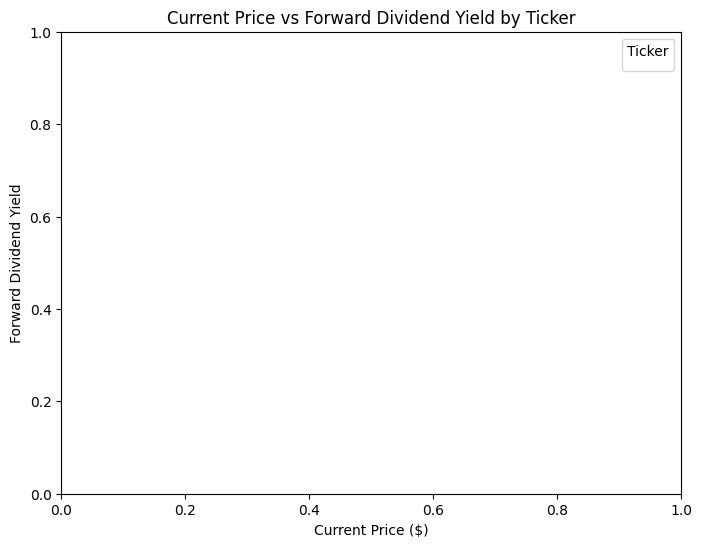

In [17]:

#Visualizations

#scatter plot current price vs div yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='currentPrice', y='divYieldFWD', hue='ticker', data=data)
plt.title('Current Price vs Forward Dividend Yield by Ticker')
plt.xlabel('Current Price ($)')
plt.ylabel('Forward Dividend Yield')
plt.legend(title='Ticker')
plt.savefig(os.path.join(os.path.dirname(__file__),f'viz/Price vs Div yield scatter {l_datum}.png'))

sector_counts = sorted_data['sector'].value_counts()

plt.figure(figsize=(12, 8))
sector_counts.plot(kind='pie',  fontsize=15, style='_classic_test_patch', autopct='%.1f%%')
plt.axis('equal')  
plt.title('Sector distribution', fontsize=18, fontweight='bold')
plt.xlabel('Sector', weight="bold", color="#000000", fontsize=14, labelpad=20)
plt.ylabel('Counts', weight="bold", color="#000000", fontsize=14, labelpad=20)
plt.savefig(os.path.join(os.path.dirname(__file__),f'viz/Sector distribution {l_datum}.png'))

corr_df = data[['Points', 'divGrowthStreak_norm', 'divYieldFWD_norm', 'payoutRatio_norm', 'freeCashFlowPayout_norm']]
plt.figure(figsize=(16, 10))
sns.heatmap(corr_df.corr(), annot=True)
plt.savefig(os.path.join(os.path.dirname(__file__),f'viz/Correlation {l_datum}.png'))
